In [1]:
fasta_file = "../data/ecoli_k12.fna"
tss_file = "../data/ecoli_k12_tss.txt"

In [2]:
import csv

In [3]:
positions = []
num_records = 0
with open(tss_file) as f:
    reader = csv.reader(f, delimiter='\t')
    for row in reader:
        num_records += 1
        if 'forward' in row:
            positions.append(int(row[1]))  # store second column values as an integer in positions list
            if num_records < 20:           # only print out the first few records
                print(row)
print("There are {} records.".format(num_records))

['forward', '208211']
['forward', '3402962']
['forward', '4213225']
['forward', '122770']
['forward', '1333248']
['forward', '1333605']
['forward', '1333651']
['forward', '131319']
['forward', '131364']
['forward', '1150597']
['forward', '2585297']
['forward', '484723']
There are 1648 records.


Here are the first 20 positions:

In [4]:
print(positions[:20])

[208211, 3402962, 4213225, 122770, 1333248, 1333605, 1333651, 131319, 131364, 1150597, 2585297, 484723, 496163, 402711, 3279711, 1064582, 637944, 638025, 4412070, 1486014]


In [5]:
sample_positions = [p for p in positions if p < 15000]
print(sample_positions)

[11848, 11923, 11944, 10444, 10443, 7991, 148]


In [6]:
sample_positions.sort()
print(sample_positions)

[148, 7991, 10443, 10444, 11848, 11923, 11944]


In [7]:
# modify to use readlines
take_sample = True
seq = ''
# open the fasta file
num_lines = 0
f = open(fasta_file)
for line in f:
    # discard newline at end (if any)
    line = line.rstrip()
    # distinguish header from sequence
    if line.startswith('>'):
        # header information
        words = line.split()
        # extract gi number
        name = words[0][1:]
    else: # line sequence, not header
        seq = seq + line
        if take_sample:
            if len(seq) > 15000:
                break
f.close()

In [8]:
seq

'AGCTTTTCATTCTGACTGCAACGGGCAATATGTCTCTGTGTGGATTAAAAAAAGAGTGTCTGATAGCAGCTTCTGAACTGGTTACCTGCCGTGAGTAAATTAAAATTTTATTGACTTAGGTCACTAAATACTTTAACCAATATAGGCATAGCGCACAGACAGATAAAAATTACAGAGTACACAACATCCATGAAACGCATTAGCACCACCATTACCACCACCATCACCATTACCACAGGTAACGGTGCGGGCTGACGCGTACAGGAAACACAGAAAAAAGCCCGCACCTGACAGTGCGGGCTTTTTTTTTCGACCAAAGGTAACGAGGTAACAACCATGCGAGTGTTGAAGTTCGGCGGTACATCAGTGGCAAATGCAGAACGTTTTCTGCGTGTTGCCGATATTCTGGAAAGCAATGCCAGGCAGGGGCAGGTGGCCACCGTCCTCTCTGCCCCCGCCAAAATCACCAACCACCTGGTGGCGATGATTGAAAAAACCATTAGCGGCCAGGATGCTTTACCCAATATCAGCGATGCCGAACGTATTTTTGCCGAACTTTTGACGGGACTCGCCGCCGCCCAGCCGGGGTTCCCGCTGGCGCAATTGAAAACTTTCGTCGATCAGGAATTTGCCCAAATAAAACATGTCCTGCATGGCATTAGTTTGTTGGGGCAGTGCCCGGATAGCATCAACGCTGCGCTGATTTGCCGTGGCGAGAAAATGTCGATCGCCATTATGGCCGGCGTATTAGAAGCGCGCGGTCACAACGTTACTGTTATCGATCCGGTCGAAAAACTGCTGGCAGTGGGGCATTACCTCGAATCTACCGTCGATATTGCTGAGTCCACCCGCCGTATTGCGGCAAGCCGCATTCCGGCTGATCACATGGTGCTGATGGCAGGTTTCACCGCCGGTAATGAAAAAGGCGAACTGGTGGTGCTTGGACGCAACGGTTCCGACTACTCTGCTGCGGTGCTGGCTGCCTGTTTACGCGCCGAT

In [9]:
up = 80
down = 20

In [10]:
# bacteria genome is circular; be careful at beginning and end; loop around
pos1 = sample_positions[0]
pos1

148

In [19]:
from util import nt_to_fe

In [20]:
nt_to_fe('TT')

-1.0

In [22]:
outfile = open("promoter_out.csv", "w")
promoters = []
for tss in sample_positions[:5]:
    promoter_nt = seq[tss-up:tss+down]
    for i in range(len(promoter_nt)-1):
        #print(promoter[i:i+2])
        outfile.write(str(nt_to_fe(promoter_nt[i:i+2])) + ",")
    outfile.write("\n")
outfile.close()

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt

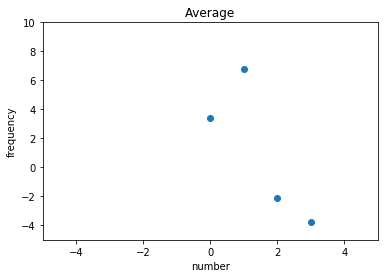

In [34]:
plt.plot([3.4, 6.8, -2.1, -3.8], 'o')
plt.xlim(-5,5)
plt.ylim(-5,10)
plt.title("Average")
plt.xlabel("number")
plt.ylabel("frequency")